In [2]:
# Try Linear regression on same prediction data using Tensorflow

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
# Use seaborn for pairplot
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [4]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [5]:
df_inputs = pd.DataFrame(inputs, columns = ['temp','rainfall','humidity'])
features = df_inputs.copy()
train_features = features[:10]
test_features = features[10:] 

df_targets = pd.DataFrame(targets, columns = ['apples'])
label = df_targets.copy()
train_label =  label[:10]
test_label = label[10:]

In [6]:
#print(train_data)
print(train_features)
print(train_label)

    temp  rainfall  humidity
0   73.0      67.0      43.0
1   91.0      88.0      64.0
2   87.0     134.0      58.0
3  102.0      43.0      37.0
4   69.0      96.0      70.0
5   73.0      67.0      43.0
6   91.0      88.0      64.0
7   87.0     134.0      58.0
8  102.0      43.0      37.0
9   69.0      96.0      70.0
   apples
0    56.0
1    81.0
2   119.0
3    22.0
4   103.0
5    56.0
6    81.0
7   119.0
8    22.0
9   103.0


In [7]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
temp,84.400002,12.712199
rainfall,85.599998,32.031929
humidity,54.400002,13.175735


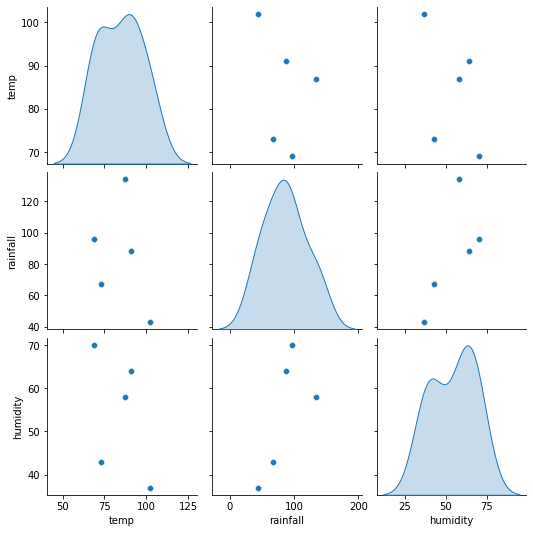

In [8]:
sns.pairplot(train_features[['temp', 'rainfall', 'humidity']], diag_kind='kde')

In [9]:
# with one variable input "Temp"

In [10]:
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing

In [11]:
temp = np.array(train_features['temp'])

temp_normalizer = preprocessing.Normalization(input_shape=[1, ], axis = None)
temp_normalizer.adapt(temp)

In [12]:
temp_linear_model = tf.keras.Sequential([
    temp_normalizer,
    layers.Dense(units=1)           
])

In [13]:
temp_linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [14]:
temp_linear_model.predict(temp[1:6])

array([[ 0.56522846],
       [ 0.22266567],
       [ 1.507276  ],
       [-1.3188668 ],
       [-0.97630405]], dtype=float32)

In [15]:
temp_linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss='mean_absolute_error')

In [16]:
%%time
history = temp_linear_model.fit(
    train_features['temp'], train_label,
    epochs = 1000,
    # suppress logging
    verbose = 0,
    # Calculate validation results on 10% of the training data
    validation_split = 0.3)

CPU times: user 15.9 s, sys: 758 ms, total: 16.7 s
Wall time: 15.8 s


In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,val_loss,epoch
990,27.708002,47.961269,990
991,27.701704,47.983418,991
992,27.695374,48.006252,992
993,27.689022,48.029697,993
994,27.682652,48.053696,994
995,27.676260,48.078197,995
996,27.669847,48.103149,996
997,27.663424,48.128521,997
998,27.656979,48.154247,998
999,27.650524,48.180317,999


In [18]:
test_results = {}

test_results['temp_linear_model'] = temp_linear_model.evaluate(
    test_features['temp'],
    test_label, verbose=0)

In [19]:
test_results['temp_linear_model']

33.804927825927734

In [20]:
y = temp_linear_model.predict(test_features['temp'])

In [21]:
y

array([[56.004025],
       [56.52032 ],
       [56.40559 ],
       [56.835835],
       [55.889294]], dtype=float32)

In [22]:
norm_test_features = np.linalg.norm(test_features['temp'])
norm_train_features = np.linalg.norm(train_features['temp'])
# norm_test_label = np.linalg.norm(test_label['temp'])
norm_train_label = np.linalg.norm(train_label['apples'])


normal_array_test_features = test_features['temp']/norm_test_features
normal_array_train_features = train_features['temp']/norm_train_features
normal_array_train_label = train_label['apples']/norm_train_label

print(normal_array_train_features)
print(normal_array_test_features)
print(normal_array_train_label)


0    0.270764
1    0.337528
2    0.322692
3    0.378328
4    0.255928
5    0.270764
6    0.337528
7    0.322692
8    0.378328
9    0.255928
Name: temp, dtype: float32
10    0.382919
11    0.477337
12    0.456355
13    0.535037
14    0.361937
Name: temp, dtype: float32
0    0.211808
1    0.306366
2    0.450093
3    0.083210
4    0.389576
5    0.211808
6    0.306366
7    0.450093
8    0.083210
9    0.389576
Name: apples, dtype: float32


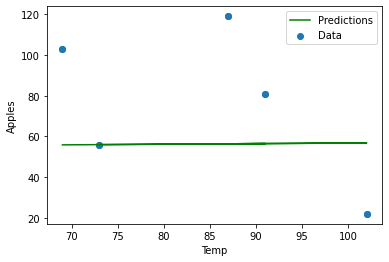

In [23]:
# def plot_Apples(x, y):
#   plt.scatter(normal_array_train_features, normal_array_train_label, label = 'Data')
#   plt.plot(x, y, color='g', label = 'Predictions')
#   plt.xlabel('Temp')
#   plt.ylabel('Apples')
#   plt.legend()

def plot_Apples(x, y):
  plt.scatter(train_features['temp'], train_label['apples'], label = 'Data')
  plt.plot(x, y, color='g', label = 'Predictions')
  plt.xlabel('Temp')
  plt.ylabel('Apples')
  plt.legend()
  
plot_Apples(test_features['temp'], y)

NOW FOR MANY INPUTS

In [24]:
normalizer = preprocessing.Normalization(axis = -1)

In [25]:
normalizer.adapt(np.array(train_features))

In [26]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [27]:
linear_model.predict(train_features[:9])

array([[ 1.21885   ],
       [-0.38611817],
       [-1.5284704 ],
       [-0.72623783],
       [ 1.4219766 ],
       [ 1.21885   ],
       [-0.38611817],
       [-1.5284704 ],
       [-0.72623783]], dtype=float32)

In [28]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate = 0.1),
    loss='mean_absolute_error')


In [29]:
%%time
history = linear_model.fit(
    train_features, train_label, 
    epochs = 1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 15.6 s, sys: 736 ms, total: 16.3 s
Wall time: 20.8 s


In [30]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_label, verbose = 0)

test_results['linear_model']

0.8585899472236633